Osnabrück University - Machine Learning (Summer Term 2024) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Lukas Niehaus

# Exercise Sheet 09

## Introduction

This week's sheet should be solved and handed in before end of **Sunday, June 16, 2024**. If you need help (and Google and other resources were not enough), feel free to ask in the StudIP forum, contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Independence) [0 Points]

This exercise is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** Explain the idea of stochastical independence. What is the intuition and how is it defined?

YOUR ANSWER HERE

**b)** What is pairwaise independence and what is mutual independence? Can you provide an example of variables that are pairwise independent but not mutual independent?

YOUR ANSWER HERE

**c)** What does it mean that variables are i.i.d.? When do we assume i.i.d. variables in machine learning and what are the consequences?

YOUR ANSWER HERE

## Assignment 1: Network Architecture and Decision Boundaries (5 points)

**a)** (ML-07 slide 58) visualizes the claim, that all (binary) classifiers can be realized by a network with at most two hidden layers. Explain the underlying idea by sketching for each of the three figures a network that would be able do represent the indicated decision boundaries. Each sketch should clarify:
* how many layers are required
* how many neurons to use in each layer
* what bias term should be put into the neuron.

Either use pen and paper and scan/photograph the result or employ your ASCII artist within the cell below.

![image](ex_1_b.jpg)

**(b)** With the online tool [TensorFlow playground](http://playground.tensorflow.org/) it is possible to interactively play with feed forward neural networks, compellingly visualize their behavior and share specific configurations. 

Follow [this link](http://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=gauss&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.56339&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true) to the TensorFlow playground. If you click it, many features are disabled and set to useful defaults, since they were either not discussed yet in the lecture or are not important for this exercise.

You will see a simple configuration: Two activated inputs ($x_1$ and $x_2$), one hidden layer with one neuron (which can be understood as a simple perceptron) and the output shown as a nice picture. It initially shows a training loss of 0.527. Try and run it to see how the perceptron can learn to separate the two clusters. Note that for the rest of the exercise we assume at most about 1000 learning steps (usually many fewer will do it), so don't wait too long in front of your browser.

The dataset gets fully classified after very few iterations. Next try the XOR dataset, either by clicking on it on the left (the top right data pattern) or by following [this link](http://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.56339&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true). You will notice that you won't achieve much better results than a loss of 0.4, which is just above chance. Try to improve the result by adding neurons and or layers (but don't change the inputs!) until you get a classification with a loss smaller than 0.01. You may also change the learning rate. Then copy the link from your browser address bar and paste it below:

Link: [link](https://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=4&seed=0.74490&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true)


reference image: ![image](ex_1_2.jpg)

How many neurons in hidden layers are already sufficient to get at least 99% classification (i.e. loss < 0.01) if they are a) in one hidden layer or b) in two hidden layers? You may consider configurations which just need above 1000 iterations to get there as well, but we don't expect you to run any configuration longer than 1000 iterations.

a) neurons in 1 hidden layer: 4  

b) neurons in 2 hidden layers: 5 total - 3 in 1st layer, 2 in 2nd layer (0.01 learning rate)


## Assignment 2: MLP - Multilayer Perceptron (10 points)

Last week you implemented a simple perceptron. We discussed that one can use multiple perceptrons to build a network. This week you will build your own MLP. Again the following code cells are just a guideline. If you feel like it, just follow the algorithm steps and implement the MLP yourself.


**Useful python methods:**
* [classes again](https://docs.python.org/3/tutorial/classes.html)
* [@property of classes](https://docs.python.org/3/library/functions.html?highlight=property#property)
* [*: An asterisk in front of an iterable denotes iterable unpacking. Its operand must be an iterable. The iterable is expanded into a sequence of items, which are included in the new tuple, list, or set, at the site of the unpacking.](https://docs.python.org/3/tutorial/controlflow.html#tut-unpacking-arguments)
* [np.append()](https://numpy.org/doc/stable/reference/generated/numpy.append.html)
* [reversed()](https://docs.python.org/3/library/functions.html#reversed)
    

### Implementation

In the following you will be guided through implementing an MLP step by step. Instead of sticking to this guide, you are free to take a complete custom approach instead if you wish.

We will take a bottom-up approach: Starting from an individual **perceptron** (aka neuron), we will derive a **layer of perceptrons** and end up with a **multilayer perceptron** (aka neural network). Each step will be implemented as its own python *class*. Such a class defines a type of element which can be instantiated multiple times. You can think of the relation between such instances and their designated classes as individuals of a specific population (e.g. Bernard and Bianca are both individuals of the population mice). Class definitions contain methods, which can be used to manipulate instance of that class or to make it perform specific actions.

To guide you along, all required classes and functions are outlined in valid python code with extensive comments. You just need to fill in the gaps. For each method the [docstring](https://www.python.org/dev/peps/pep-0257/#what-is-a-docstring) (the big comment contained by triple quotes at the beginning of the method) describes the arguments that each specific method accepts (`Args`) and the values it is expected to return (`Returns`).

### Perceptron
Similar to last week you here need to implement a perceptron. But instead of directly applying it, we will define a class which is reusable to instantiate a theoretically infinite amount of individual perceptrons. We will need the following three functionalities:

#### Weight initialization

The weights are initialized by sampling values from a standard normal distribution. There are as many weights as there are values in the input vector and an additional one for the perceptron's bias.

#### Forward-Propagation / Activation

Calculate the weighted sums of a neuron's inputs and apply it's activation function $\sigma$. The output vector $o$ of perceptron $j$ of layer $k$ given an input $x$ (the output of the previous layer) in a neural network is given by the following formula. Note: $N$ gives the number of values of a given vector, $w_{j,0}(k)$ specifies the bias of perceptron $j$ in layer $k$ and $w_{j,1...N(x)}(k)$ the other weights of perceptron $j$ in layer $k$.

$$o_{k,j}(x) = \sigma\left(w_{j,0}(k)+\sum\limits_{i=1}^{N(x)} x_i w_{j,i}(k)\right)$$

Think of the weights $w(k)$ as a matrix being located in-between layer $k$ and the layer located *to its left* in the network. So values flowing from layer $k-1$ to layer $k$ are weighted by the values of $w(k)$. As activation function we will use the sigmoid function because of its nice derivative (needed later):

$$\begin{align*}
\sigma(x) &= \frac{1}{1 + \exp{(-x)}}\\
\frac{d\sigma}{dx}(x) &= \sigma(x) \cdot (1 - \sigma(x))
\end{align*}$$

#### Back-Propagation / Adaptation
In order to learn something the perceptron needs to slowly adjust its weights. Each weight $w_{j,i}$ in layer $k$ is adjusted by a value $\Delta w_{j,i}$ given a learning rate $\epsilon$, the previous layer's output (or, for the first hidden layer, the network's input) $o_{k-1,i}(x)$ and the layer's error signals $\delta(k)$ (which will be calculated by the MultilayerPerceptron):

$$\Delta w_{j,i}(k) = \epsilon\, \delta_j(k) o_{k-1,i}(x)$$

In [55]:
import numpy as np

# Activation function σ.
# We use scipy's builtin because it fixes some NaN problems for us.
# sigmoid = lambda x: 1 / (1 + np.exp(-x))
from scipy.special import expit as sigmoid


class Perceptron:
    """Single neuron handling its own weights and bias."""

    def __init__(self, dim_in, act_func=sigmoid):
        """Initialize a new neuron with its weights and bias.

        Args:
            dim_in (int): Dimensionality of the data coming into this perceptron. 
                In a network of perceptrons this basically represents the 
                number of neurons in the layer before this neuron's layer. 
                Used for generating the perceptron's weights vector, which 
                not only includes one weight per input but also an additional 
                bias weight.
            act_fun (function): Function to apply on activation.
        """
        self.act_func = act_func
        # Set self.weights
        self.weights = np.random.normal(size = dim_in + 1)

    def activate(self, x):
        """Activate this neuron with a specific input.

        Calculate the weighted sum of inputs and apply the activation function.

        Args:
            x (ndarray): Vector of input values.

        Returns:
            float: A real number representing the perceptron's activation after 
            calculating the weighted sum of inputs and applying the 
            perceptron's activation function.
        """
        # compute weighted sum of inputs
        s = 0
        #print(f"x for perceptron activate {x=}")
        #print(f"weights for perceptron activate {self.weights=}")
        
        x_bias = list(x)
        x_bias.insert(0,1)

        for d, w in zip(x_bias, self.weights):
            # sum over all datapoints * their weights 
            s = s + w*d

        # apply activation function & return the activation value
        return self.act_func(s)

        

    def adapt(self, x, delta, rate=0.03):
        """Adapt this neuron's weights by a specific delta.

        Args:
            x (ndarray): Vector of input values.
            delta (float): Weight adaptation delta value.
            rate (float): Learning rate.
        """

        # add a 1 at start of input vector to account for the bias
        x_bias = list(x)
        x_bias.insert(0,1)
        x_bias.insert(0,1)

        #print(x_bias)


        # Adapt self.weights according to the update rule
        i = 0
        up_weight =[]
        #print(len(x_bias))
        #print(len(self.weights))
        for w in self.weights:
            # update for each individual weight
            w += rate * delta * x_bias[i]
            i += 1
            # save for later
            up_weight.append(w)

        # update sel.weights
        self.weights = up_weight


p = Perceptron(2)
assert p.weights.size == 3, "Should have a weight per input and a bias."
assert isinstance(p.activate([2, 1]), float), "Should activate as scalar."
assert -1 <= p.activate([100, 100]) <= 1, "Should activate using sigmoid."
p.weights = np.array([.5, .5, .5])
p.adapt(np.array([2, 3]), np.array(.5))
#assert np.allclose(p.weights, [0.515, 0.53, 0.545]), \
        #"Should update weights correctly."

### PerceptronLayer
A `PerceptronLayer` is a combination of multiple `Perceptron` instances. It mainly is concerened with passing input and delta values to its individual neurons. There is no math to be done here!

#### Initialization

When initializing a `PerceptronLayer` (like this: `layer = PerceptronLayer(5, 3)`), the `__init__` function is called. It creates a list of `Perceptron`s: For each output value there must be one perceptron. Each of those perceptrons receives the same inputs and the same activation function as the perceptron layer.

#### Activation

During the activation step, the perceptron layer activates each of its perceptrons. These values will not only be needed for forward propagation but will also be needed for implementing backpropagation in the `MultilayerPerceptron` (coming up next).

#### Adaptation

To update its perceptrons, the perceptron layer adapts each one with the corresponding delta. For this purpose, the MLP passes a list of input values and a list of deltas to the adaptation function. The inputs are passed to *all* perceptrons. The list of deltas is exactly as long as the list of perceptrons: The first delta is for the first perceptron, the second for the second, etc. The delta values themselves will be computed by the MLP.

In [56]:
class PerceptronLayer:
    """Layer of multiple neurons.
    
    Attributes:
        perceptrons (list): List of perceptron instances in the layer.
    """
    def __init__(self, dim_in, dim_out, act_func=sigmoid):
        """Initialize the layer as a list of individual neurons.

        A layer contains as many neurons as it has outputs, each
        neuron has as many input weights (+ bias) as the layer has inputs.

        Args:
            dim_in (int): Dimensionality of the expected input values,
                also the size of the previous layer of a neural network.
            dim_out (int): Dimensionality of the output, also the requested 
                amount of in this layer and the input dimension of the
                next layer.
            act_func (function): Activation function to use in each perceptron of
                this layer.
        """
        # Set self.perceptrons to a list of Perceptrons
        perc_list = []
        for i in range(dim_out):
            perc_list.append(Perceptron(dim_in, act_func))
        self.perceptrons = perc_list

    def activate(self, x):
        """Activate this layer by activating each individual neuron.

        Args:
            x (ndarray): Vector of input values.

        Retuns:
            ndarray: Vector of output values which can be 
            used as input to another PerceptronLayer instance.
        """
        # return the vector of activation values
        act_values = []
        for perc in self.perceptrons:
            act_values.append(perc.activate(x))
        return(act_values)

    def adapt(self, x, deltas, rate=0.03):
        """Adapt this layer by adapting each individual neuron.

        Args:
            x (ndarray): Vector of input values.
            deltas (ndarray): Vector of delta values.
            rate (float): Learning rate.
        """
        # Update all the perceptrons in this layer
        i = 0
        adapted = []
        for perc in self.perceptrons:
            # adapted.append(perc.adapt(x, deltas[i], rate)) maybe
            perc.adapt(x, deltas[i], rate)
            i += 1
        # self.perceptrons = adapted
        
    @property
    def weight_matrix(self):
        """Helper property for getting this layer's weight matrix.

        Returns:
            ndarray: All the weights for this perceptron layer.
        """
        return np.asarray([p.weights for p in self.perceptrons]).T


l = PerceptronLayer(3, 2)
assert len(l.perceptrons) == 2, "Should have as many perceptrons as outputs."
assert len(l.activate([1,2,3])) == 2, "Should provide correct output amount."

### MultilayerPerceptron

#### Forward-Propagation / Activation
Propagate the input value $x$ through each layer of the network, employing the output of the previous layer as input to the next layer.

#### Back-Propagation / Adaptation
This is the most complex step of the whole task. Split into three separate parts:

1. ***Forward propagation***: Compute the outputs for each individual layer – similar to the forward-propagation step above, but we need to keep track of the intermediate results to compute each layer's errors. That means: Store the input as the first "output" and then activate each of the network's layers using the *previous* layer's output and store the layer's activation result.

2. ***Backward propagation***: Calculate each layer's error signals $\delta_i(k)$. The important part here is to do so from the last to the first array, because each layer's error depends on the error from its following layer:

    $$\delta_i(k) = \varphi'_i(k) \sum\limits_{j=1}^{N(k+1)} w_{ji}(k+1,k)\delta_j(k+1)$$

    Since we use the sigmoid function $\sigma(t)=\frac{1}{1+e^{-t}}$ as activation function $\varphi$ the derivative is $\varphi'_i(k) = \sigma'_i(k) = \sigma_i(k)\ (1 - \sigma_i(k))$ and the formula becomes:

    $$\delta_i(k) = \sigma_i(k)\ (1 - \sigma_i(k))\ \sum\limits_{j=1}^{N(k+1)} w_{ji}(k+1,k)\delta_j(k+1)$$

    (*Hint*: For the last layer (i.e. the first you calculate the $\delta$ for) the sum in the formula above is the total network error. For all preceding layers $k$ you need to recalculate `e` using the $\delta$ and weights of layer $k+1$. We already implemented a helper function for you to access the weights of a specific layer. Check the `PerceptronLayer` if you did not find it yet.)

3. ***Adaptation***: Call each layers adaptation function with its input, its designated error signals and the given learning rate.

Hint: The last two steps can be performed in a single loop if you wish, but make sure to use the non-updated weights for the calculation of the next layer's error signals!

In [57]:
class MultilayerPerceptron:
    """Network of perceptrons, also a set of multiple perceptron layers.
    
    Attributes:
        layers (list): List of perceptron layers in the network.
    """
    def __init__(self, *layers):
        """Initialize a new network, madeup of individual PerceptronLayers.

        Args:
            *layers: Arbitrarily many PerceptronLayer instances.
        """
        self.layers = layers

    def activate(self, x):
        """Activate network and return the last layer's output.

        Args:
            x (ndarray): Vector of input values.

        Returns:
            (ndarray): Vector of output values from the last layer of the 
            network after propagating forward through the network.
        """
        # Propagate activation through the network
        # and return output for last layer

        for layer in self.layers:
            # compute output of layer
            x = layer.activate(x)
            # output becomes input for next layer
            # x = out #maybe
        return x

    def adapt(self, x, t, rate=0.03):
        """Adapt the whole network given an input and expected output.

        Args:
            x (ndarray): Vector of input values.
            t (ndarray): Vector of target values (expected outputs).
            rate (float): Learning rate.
        """
        # Activate each layer and collect intermediate outputs.
        # * Iterate through all layers and activate them with the output
        #       of the previous layer. 
        # * Create a list with all the outputs.
        # * Call the first layer with the input x
        outlist = [x]
        for layer in self.layers:
            out = layer.activate(x)
            outlist.append(out)
            # output becomes input for next layer
            x = out

        # Calculate error 'e' between t and network output, i.e
        # the last element of the list of outputs. Here the error
        # is the difference between t and the output.
        er = int(t) - outlist[-1][0]
        #er = [outlist[-1][0] - int(t)] maybe
        
        # Backpropagate the error through the network computing
        # the intermediate deltas and adapting each layer.
        # * Reversly iterate through the layers
        # * Get the input of the layer. I.e. the output of the previous layer
        # * Get the output of the layer
        # * Compute delta using the output of the layer and the error.
        #      (Use the derivative of the sigmoid activation function)
        #      (The error for the last layer is computed above)
        # * Compute the error for the previous layer in the network
        #      using the weight matrix and delta
        # * Adapt the layer using the input of the layer, delta and the learning rate
        ind = len(self.layers) - 1
        for layer in reversed(self.layers):
            input = outlist[ind-1]
            output = outlist[ind]
            deltas = []
            for perc in layer.perceptrons:
                sum = 0
                for j in range(0, len(output)):
                    #print(layer.weight_matrix[0])
                    #print(f"{j=}, {layer.weight_matrix=}, {er=}")
                    sum += layer.weight_matrix[j][0] * er#[j]
                
                delta = perc.activate(input) * (1 - perc.activate(input)) * sum
                deltas.append(delta)
            
            ############### nochmal anschauen
            er = (layer.weight_matrix @ deltas)
            print(f"ER = {er}")

            
            layer.adapt(input, deltas, rate)

            ind -= 1

In [58]:
len([1,2,4,5,6])

5

### Classification

#### Problem Definition
Before we start, we need a problem to solve. In the following cell we first generate some two dimensional data (= $\text{input\_dim}$) between 0 and 1 and label all data according to a binary classification: If the data is close to the center (radius < 2.5), it belongs to one class, if it is further away from the center it belongs to the other class.

In the cell below we visualize the data set.

In [59]:
def uniform(a, b, n=1):
    """Returns n floats uniformly distributed between a and b."""
    return (b - a) * np.random.random_sample(n) + a


n = 1000
radius = 5
r = np.append(uniform(0, radius * .5, n // 2),
              uniform(radius * .7, radius, n // 2))
angle = uniform(0, 2 * np.pi, n)
x = r * np.sin(angle) + uniform(-radius, radius, n)
y = r * np.cos(angle) + uniform(-radius, radius, n)
inputs = np.vstack((x, y)).T
targets = np.less(np.linalg.norm(inputs, axis=1), radius * .5)

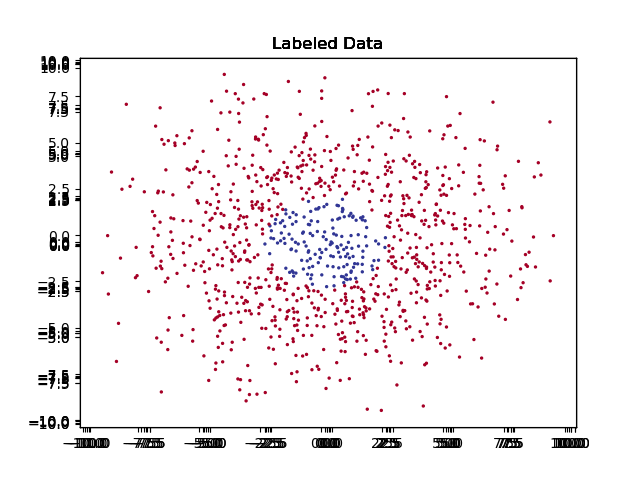

In [60]:
%matplotlib ipympl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(num='Data')
ax.set(title='Labeled Data')
ax.scatter(*inputs.T, 2, c=targets, cmap='RdYlBu')
plt.show()

### Model Design
The following cell already contains a simple model with a single layer. Play around with some different configurations!

In [63]:
MLP = MultilayerPerceptron(
    PerceptronLayer(2, 1),
)
# Adapt this MLP
# YOUR CODE HERE
# mehr perceptron layers

### Training
Train the network on random samples from the data. Try adjusting the epochs and watch the training performance closely using different models.

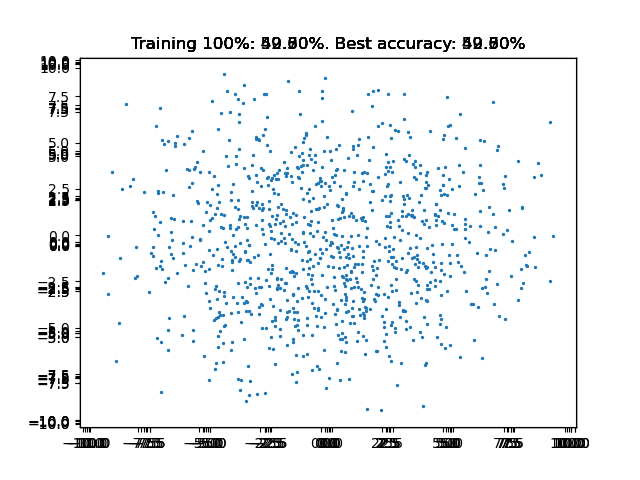

EPOCH 1
ER = [-0.07345564 -0.07880756  0.06310196  0.00868677  0.09752331]


IndexError: list index out of range

In [62]:
%matplotlib ipympl
from matplotlib import cm

EPOCHS = 2500#0000

max_accuracy = 0

fig, ax = plt.subplots(num='Training')
scatter = ax.scatter(*inputs.T, 2)
plt.show()

for epoch in range(1, EPOCHS + 1):
    print(f"EPOCH {epoch}")
    sample_index = np.random.randint(0, len(targets))
    MLP.adapt(inputs[sample_index], targets[sample_index])

    if (epoch % 2500) == 0:
        outputs = np.squeeze([MLP.activate(x) for x in inputs])
        predictions = np.round(outputs)
        accuracy = np.sum(predictions == targets) / len(targets) * 100
        if accuracy > max_accuracy:
            max_accuracy = accuracy
        scatter.set_color(cm.RdYlBu(outputs))
        ax.set(title=f'Training {epoch / EPOCHS * 100:.0f}%: {accuracy:.2f}%. Best accuracy: {max_accuracy:.2f}%')
        fig.canvas.draw()

### Evaluation

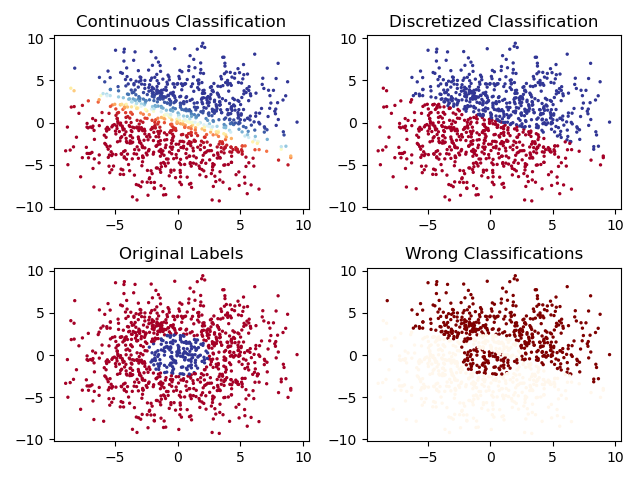

In [ ]:
%matplotlib ipympl
#outputs = outlist
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].scatter(*inputs.T, 2, c=outputs, cmap='RdYlBu')
ax[0, 0].set_title('Continuous Classification')
ax[0, 1].set_title('Discretized Classification')
ax[0, 1].scatter(*inputs.T, 2, c=np.round(outputs), cmap='RdYlBu')
ax[1, 0].set_title('Original Labels')
ax[1, 0].scatter(*inputs.T, 2, c=targets, cmap='RdYlBu')
ax[1, 1].set_title('Wrong Classifications')
ax[1, 1].scatter(*inputs.T, 2, c=(targets != np.round(outputs)), cmap='OrRd')
fig.tight_layout()
plt.show()

### Results
Document your results in the following cell. We are interested in which network configurations you tried and what accuracies they resulted in. Did you run into problems during training? Was it steady or did it get stuck? Did you recognize anything about the training process? How could we get better results? Tell us!

YOUR ANSWER HERE

## Assignment 3: Nearest Neighbor Theory (5 points)

In this exercise you will examine some aspects of the nearest neighbor algorithm in more detail. Not all questions have been answered in the lecture, so you may refer to literature for a deeper understanding.

### a) The nearest neighbor algorithm

Explain in your own words the nearest neighbor algorithm.  What prerequisites have to be fulfilled to apply the algorithm? To what kind of tasks can it be applied? What additional problem arises when considering multiple nearest neighbors instead of only one?

nearest neighbor alg:
- form of instance-based learning --> simply memorizing the training data in training
- classification of new instances: find the best match among the memorized examples (for discrete valued output: voting among k nearest neighbors (when looking at 3 neighbors and 2 say "cat" and 1 says "dog": outout = "cat"); for real valued output: calculate the mean among the neighbors (sum over the neighbor's assignment, divide by nbr of considered neighbors)

prerequisites:
- enough memory for training example storage (no compression)
- choosing k neighbors to consider (globally)
- decide on a distance metric to use to define "nearest" (e.g. euclidean)
- scaling of features in data (prevent bias of differently scaled features (e.g. distance from home town to capital city in km vs age of person --> different range --> needs to be standardized)

kind of applications:
- classifications (both in real and discrete valued outputs)
- recommendation systems (movies, amazon products, books, ads)
- forecasts (climate, stock market, currency exchange rates)
- medical applications (patient risk factors etc)
- important to consider: may be slow; is sensitive to errors / noise

additional problems / properties for multiple nearest neighbors instead of 1: 
- 1 nearest neighbor: hard boundaries via voronoi tesselation cells | KNN allows continuous transitions
- overfitting can occur
- for discrete valued output where voting is used: if k is an even number: ties can occur --> then have to randomly choose or define explicitly some other way to deal with this


### b) Inductive bias

What is the inductive bias of nearest neighbor learning? In what sense is it a local method?

inductive bias:
- instances which are close to each other in the feature space should yield the same classification --> assume inherently clustered data
- all features are equally important
- all considered k nearest neighbors are equally important (if using unweighted KNN)

local method:
- approximates the output locally for each instance --> only local (close) training instances are considered for classification of a new instance (is not global)


### c) Curse of dimensionality

What problems do you anticipate when applying the nearest neighbor algorithm in high dimensional spaces? How would you mitigate those problems?

- memory issues [highly dimensional data needs to be stored --> takes up space]
- when computing distances --> again need to consider many dimensions: computationally expensive && random pairs of vectors from high dimensional space tend to have similar distances --> when comparing distances to find nearest neighbors: problematic
- data becomes quite sparse --> need more data samples for training as number of features increases --> will make overfitting more likely --> noise has higher chance to influence the predictions
- solutions: apply dimension reduction methods (like PCA)


### d) Nearest neighbor search

The lecture slides claim that application of the nearest neighbor approach may be slow (for many stored examples). Explain this statement: what is the complexity?  What methods could be applied to improve the situation?

- more examples require more storage && more importantly, when deciding which neighbors are the nearest one needs to go through all examples to calculate the distances (will take longer the more examples you have)
solutions: 
- if possible... use less examples
- partition data into sub-regions (clusters essentially, could be done w/ tree structure / indexes) --> for new classifications: figure out in which region the new instance is --> no need to compute distances to training examples from another sub-region far away from the specified region ==> reduces nbr of instances you consider as nearest neighbors


### e) Sensitivity to noise

Why is the nearest neighbor approach sensitive to noise? What is the essential difference to other learning approaches, that are less sensitive to noise? How could the nearest neighbor approach be made less noise sensitive?

- sensitive to noise bc it just memorizes the training examples --> any noise in the training data will be passed on to the new classifications simply by design of the algorithm
less sensitive solutions:
- consider a higher number of k --> noise in a single neighbor will be less influential due to the consideration of more data points beside just this one noisy one
- preprocess data by removing outliers, misclassifications
- choose a distance fct that is less sensitive to outliers (i.e. find replacement for euclidean distance)
- remove irrelevant features / very noisy features 
